<a href="https://colab.research.google.com/github/gimquokka/ML/blob/master/TF_Tutorial_Basic_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Basic classification: Classify images of clothing 💪

In [95]:
# Import essential libraries
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.2.0


In [0]:
(x_train,y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [97]:
print('x_train.shape \n', x_train.shape)
print('y_train.shape \n', y_train.shape)
print('x_test.shape \n', x_test.shape)
print('y_test.shape \n', y_test.shape)

x_train.shape 
 (60000, 28, 28)
y_train.shape 
 (60000,)
x_test.shape 
 (10000, 28, 28)
y_test.shape 
 (10000,)


In [0]:
class_naems = np.array(['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
                        'Sandal','Shirt', 'Sneaker', 'Bag', 'Ankle boot'])

([], <a list of 0 Text major ticklabel objects>)

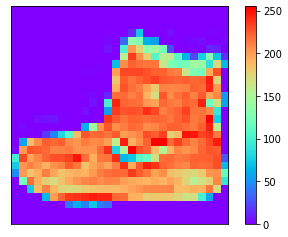

In [99]:
# Exam dataset
plt.figure()
plt.imshow(x_train[0], cmap = plt.cm.rainbow)
plt.colorbar()
plt.xticks([])
plt.yticks([])

In [0]:
x_train = x_train/255.0

x_test = x_test/255.0

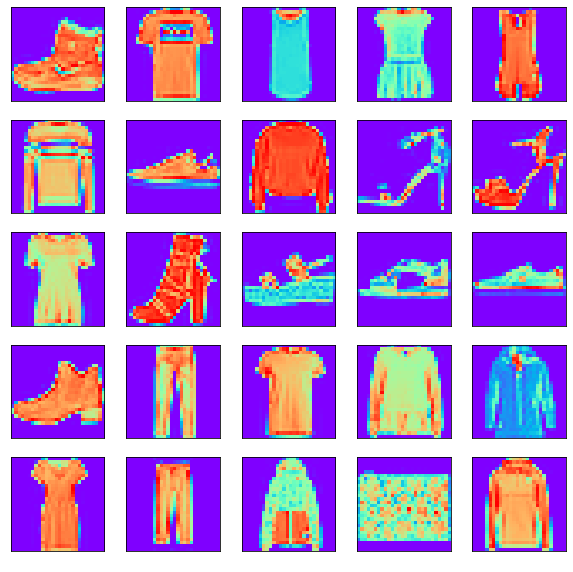

In [101]:
plt.figure(figsize=(10,10))

for i in range(25):
  plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(x_train[i], cmap=plt.cm.rainbow)
  plt.xlabel(class_naems[y_train[i]], color = 'white')
plt.show()

In [0]:
# Define CF model

model = tf.keras.Sequential()
# model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(100, activation='relu'))
model.add(tf.keras.layers.Dense(10))

model = tf.keras.Sequential([
    # keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

In [0]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [104]:
model.fit(x_train, y_train, batch_size=10, epochs=3)

Epoch 1/3
6000/6000 [==============================] - 9s 2ms/step - loss: 0.4790 - accuracy: 0.8295
Epoch 2/3
6000/6000 [==============================] - 9s 2ms/step - loss: 0.3670 - accuracy: 0.8658
Epoch 3/3
6000/6000 [==============================] - 9s 2ms/step - loss: 0.3337 - accuracy: 0.8772


In [105]:
a, b = model.evaluate(x_test, y_test, verbose=1)

313/313 [==============================] - 0s 1ms/step - loss: 0.3917 - accuracy: 0.8631


## Make predictions

In [0]:
probability_model = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()])

In [0]:
predictions = probability_model.predict(x_test)

## Check out training result

In [108]:
np.argmax(predictions[:1])

9

In [109]:
y_test[0]

9

## Visualize prediction result

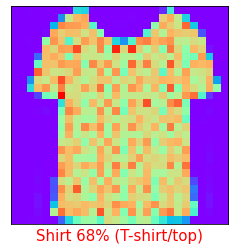

In [110]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)

  plt.imshow(img, cmap=plt.cm.rainbow)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'c'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_naems[predicted_label], 
                                       100*np.max(predictions_array), 
                                       class_naems[true_label]), color = color, size = 15)
# Testing plot_image function
predictions_array = probability_model.predict(x_test)
plot_image(1000, predictions_array, y_test, x_test)

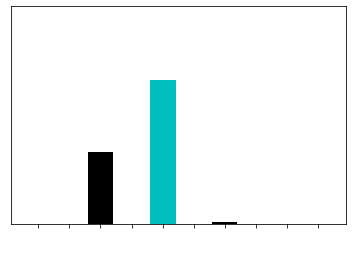

In [139]:
def plot_predictions_bar(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  # plt.grid(True)
  plt.xticks(range(10), color = 'white', size = 15)
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color = 'black')
  # plt.bar(range(10), predictions_array, color = 'black')
  plt.ylim([0,1])
  predicted_label = np.argmax(predictions_array)
  
  # Similar logic with to if statement
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('c')

# Test plot_predictions_bar function
plot_predictions_bar(10, predictions_array, y_test)

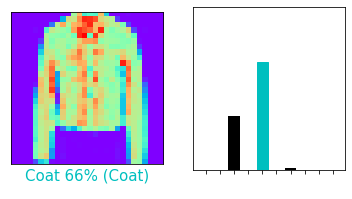

In [140]:
i = 10
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plot_image(i, predictions_array, y_test, x_test)
plt.subplot(1, 2, 2)
plot_predictions_bar(i, predictions_array, y_test)
plt.show()

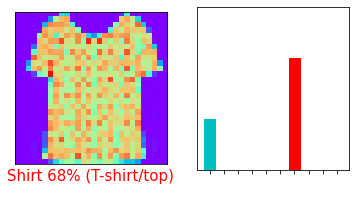

In [141]:
i = 1000
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plot_image(i, predictions_array, y_test, x_test)
plt.subplot(1, 2, 2)
plot_predictions_bar(i, predictions_array, y_test)
plt.show()

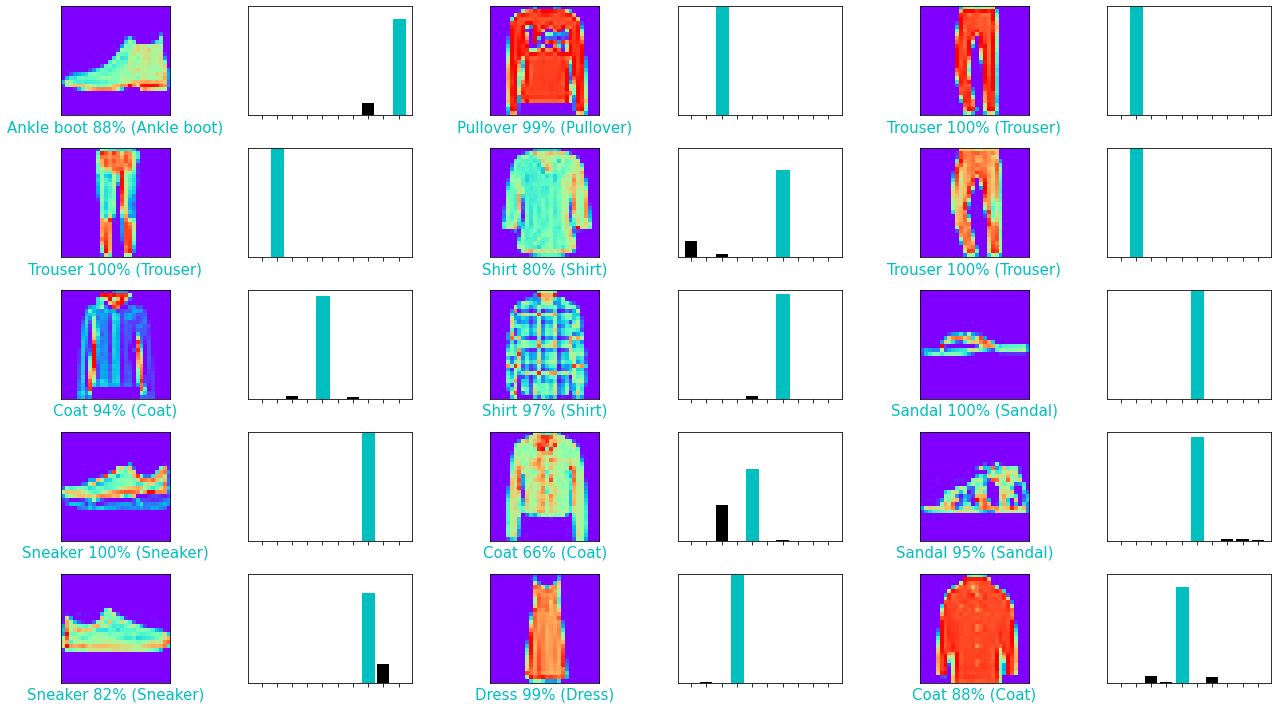

In [145]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols

plt.figure(figsize=(3*2*num_cols, 2*num_rows))

for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions_array, y_test, x_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_predictions_bar(i, predictions_array, y_test)
plt.tight_layout()
plt.show()

In [155]:
img = x_test[10]

print(img.shape)

(28, 28)


In [157]:
img = (np.expand_dims(img, 0))

print(img.shape)

(1, 28, 28)


In [164]:
predictions_single = probability_model.predict(img)

print(np.argmax(predictions_single)+1)

5


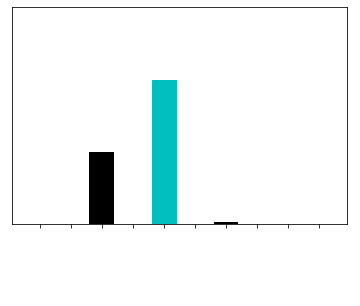

In [163]:
plot_predictions_bar(10, predictions_array, y_test)
_ = plt.xticks(range(10), class_naems, rotation=45)

# Test Zone

In [0]:
y_train[:10]

In [0]:
print(x_test[0].shape)